<a href="https://colab.research.google.com/github/bavilaa/nlp_got/blob/master/exploring_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Y,si             , _ ,
#                ( o o )
#               /'` ' `'\
#        ,      |'''''''|
#               |\\'''//|
#                  """
#BAA

In [0]:
#Activating Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [14]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import pandas as pd
#plotting the index vs rating
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
route = '/content/drive/My Drive/Colab Notebooks/Project_NLP/'
bd_name =  "scripts_bd.csv"

df = pd.read_csv(route + bd_name)

In [17]:
df.head()

,Unnamed: 0,Season_Episode,Script,Status,Season,Episode
0,0,s01e01,"Easy, boy. What do you exp...",1,1,1
1,1,s01e02,"You need to drink, child. ...",1,1,2
2,2,s01e03,"Welcome, Lord Stark. Grand...",1,1,3
3,3,s01e04,The little lord's been dre...,1,1,4
4,4,s01e05,Does Ser Hugh have any fam...,1,1,5


In [0]:
#Counting the number of words of every Script

df['totalwords'] = df['Script'].str.split().str.len()



In [0]:
df.sort_values(['Season' , 'Episode'])
#reseting the index
df = df.reset_index()


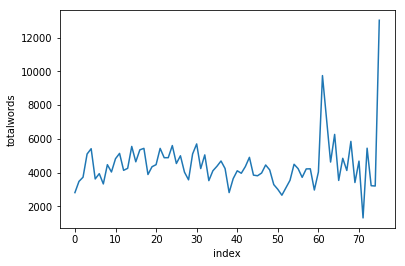

In [29]:
sns.lineplot(x="index", y="totalwords",
legend="full", data=df);

In [30]:
df['totalwords']

0      2813.0
1      3478.0
2      3727.0
3      5101.0
4      5416.0
5      3623.0
6      3938.0
7      3328.0
8      4469.0
9      4036.0
10     4822.0
11     5138.0
12     4134.0
13     4253.0
14     5551.0
15     4640.0
16     5349.0
17     5436.0
18     3887.0
19     4348.0
20     4470.0
21     5435.0
22     4882.0
23     4883.0
24     5602.0
25     4538.0
26     4997.0
27     4024.0
28     3571.0
29     5104.0
       ...   
46     3974.0
47     4451.0
48     4159.0
49     3289.0
50     3006.0
51     2659.0
52     3102.0
53     3542.0
54     4494.0
55     4233.0
56     3719.0
57     4218.0
58     4225.0
59     2968.0
60     4037.0
61     9749.0
62        NaN
63     4625.0
64     6263.0
65     3536.0
66     4847.0
67     4125.0
68     5850.0
69     3412.0
70     4680.0
71     1314.0
72     5446.0
73     3223.0
74     3204.0
75    13029.0
Name: totalwords, Length: 76, dtype: float64